# PROJECT SUMMARY:

- The dataset is from INX future incoporated, regarding its employee performance.
- The data set consists of 28 columns regarding employee details such as gender, age, department, performance rating etc.
- The employee performance were classified into 3 categories(2,3,4).
- Deatiled departmental analysis was done.
- Total 26 columns were used as predictor variables and 'Performance rating' was used as Target variable.

# DATA:

- INX Future Incoporated has provided with the data in a xls format for about 1200 of their employees.

# ANALYSIS:

- In the departmental wise analysis, datascience department: more employees with rating-3, than the rest. 
- 'Single'(marital status) employees got only the performance of 3, while Married employees were the only ones to score rating-   4.
- In the same datascience department, employees not willing over work, never got rating of 2(lowest).
- Data science was the smallest department among the departments with 20 employees.
- More employees not willing to over work.
- Mean age of work force was 38years.

- In 'Development' department:   One among the largest department in the firm with large work force.
- Rating 3 was most prevalent among the employees.
- In the business travel frequency, there was a class of employees with 'No-Travel'.
- Mean age of the work force is around 37years.
- More employees willing to over work.
- Both employees willing to over work and not willing to over work were given rating 4.

- 'Research and Development' : One among the largest department was large work force.
- Gender distribution gap is observed.
- Mean age of employees is around 37years.
- More number of rating-3 was observed compared to other ratings.

# SUMMARY
- MODEL SELECTED : XGB CLASSIFIER
- METRICS USED TO EVALUATE : ACCURACY SCORE, CROSS TAB, PRECISION AND RECALL SCORE.
- DATA PRE-PROCESSING : LABEL ENCODER, DROP
- HYPER PARAMETER TUNING : GRIDSEARCH CV
- LIBRARIES USED  : PANDAS,NUMPY,SKLEARN,MATPLOTLIB,SEABORN.
- ACCURACY_SCORE : 93% USING GRIDSEARCH CV
- 

# IMPORTANT FACTORS AFFECTING RATING:
- USING EXTERNAL TREES CLASSIFIER, IDENTIFIED IMPORTANT FEATURES.
- EMPLOYEE ENVIRONMENT SATISFACTION
- EMPLOYEE LAST YEARS SINCE PROMOTION
- PREVIOUS HIKE PERCENTAGE
- ABOVE FACTORS AFFECTED THE PERFORMANCE MORE.

# RECOMMENDATION/SCOPE FOR IMPROVEMENT:
- BY IMPROVING/INCREASING THE HIKE PERCENTAGE IN SALARY WOULD IMPROVE THE EMPLOYEE PERFORMANCE RATING.
- DEPARTMENT IN WHICH, THEY ARE WORKING HAS ALSO CONTRIBUTED TO THE RATING, IT WOULD BETTER TO PUT EMPLOYEES IN THE DEPARTMENT   OF THEIR CHOICE.
- IMPROVING THE EMPLOYEE WORK ENVIRONMENT ALSO WOULD HELP IN BETTER PERFORMANCE RATING IN THE FUTURE.
- PROMOTIONS COULD BE MADE MORE FREQUENTLYC IN SHORTER YEARS.

In [1]:
pwd  #checking for directory.

'C:\\Users\\R BASKARAN'

In [268]:
#IMPORTING NECESSARY PACKAGES: 

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV 

# DATA:

In [231]:
#IMPORTING THE DATASET:

data_raw = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data_raw.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4


# DATA_EXPLORATORY_ANALYSIS:

In [9]:
#SHAPE OF THE DATASET:

print('shape of dataset:',data_raw.shape)

shape of dataset: (1200, 28)


In [10]:
# LOOKING FOR NAN VALUES:

data_raw.isnull().sum()


EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [11]:
#Description of the dataset and the columns:

data_raw.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [12]:
#INFORMATION ABOUT THE DATASET.........

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [19]:
# DEPARTMENT WISE EMPLOYEE ALLOCATION:

Department = pd.Series(Counter(data_raw.EmpDepartment))
Department

Sales                     373
Human Resources            54
Development               361
Data Science               20
Research & Development    343
Finance                    49
dtype: int64

# Department wise performance:

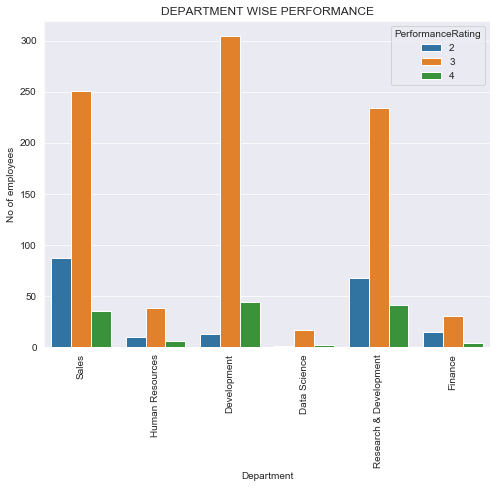

In [353]:
sb.set_style(style="darkgrid")

sb.countplot('EmpDepartment',hue='PerformanceRating',data=data_raw)
plt.title('DEPARTMENT WISE PERFORMANCE')
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.ylabel('No of employees')
plt.show()



# DATA SCIENCE DEPARTMENT ANALYSIS:

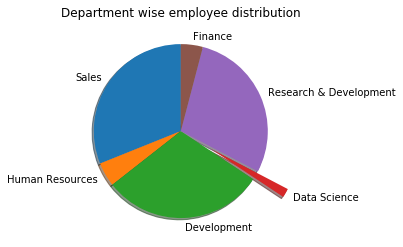

In [61]:
plt.title('Department wise employee distribution')  #TITLE OF THE PIE CHART.....
plt.pie(Department,labels=Department.index,startangle=90,shadow=True,explode=[0,0,0,0.4,0,0])  #PLOTTING THE PIE CHART....BY EXPLODING DATASCIENCE DEPT
plt.show()


In [51]:
#USING LOC TO FILTER OUT DATA PERTAINING TO DATA SCIENCE DEPT.....

data_raw_datascience=data_raw.loc[data_raw['EmpDepartment']=='Data Science']
data_raw_datascience

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3
120,E1001223,48,Male,Medical,Married,Data Science,Data Scientist,Travel_Rarely,20,4,...,1,13,2,2,0,0,0,0,No,3
942,E100574,51,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,8,4,...,4,16,5,1,10,9,4,7,No,3
964,E100610,39,Female,Medical,Divorced,Data Science,Data Scientist,Travel_Rarely,1,4,...,3,7,1,3,3,2,1,2,No,3
966,E100612,41,Male,Life Sciences,Divorced,Data Science,Data Scientist,Travel_Rarely,19,2,...,1,17,2,2,1,0,0,0,No,3
978,E100630,40,Male,Medical,Divorced,Data Science,Data Scientist,Travel_Rarely,2,2,...,4,22,5,3,21,7,3,9,No,2
986,E100645,31,Male,Medical,Married,Data Science,Data Scientist,Travel_Rarely,23,3,...,2,10,2,3,9,0,7,8,No,4
996,E100662,26,Female,Life Sciences,Divorced,Data Science,Data Scientist,Travel_Frequently,1,3,...,1,6,6,1,6,5,1,4,No,3


In [132]:
#Statistical measures for data science department:

data_raw_datascience.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,38.000000,9.650000,2.750000,2.950000,62.250000,2.900000,2.100000,2.700000,2.100000,16.450000,2.500000,12.100000,2.950000,2.50000,5.850000,3.000000,1.550000,3.800000,3.050000
std,9.256577,7.631479,1.069924,0.998683,21.202967,0.447214,1.293709,1.031095,1.889026,3.284333,1.147079,7.806205,1.394538,0.82717,5.421934,3.026201,2.282081,3.621573,0.394034
min,21.000000,1.000000,1.000000,1.000000,30.000000,2.000000,1.000000,1.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.250000,2.000000,2.000000,2.000000,44.250000,3.000000,1.000000,2.000000,1.000000,14.000000,1.750000,6.750000,2.000000,2.00000,1.750000,0.000000,0.000000,0.000000,3.000000
50%,38.500000,8.500000,3.000000,3.000000,64.500000,3.000000,2.000000,3.000000,2.000000,16.500000,2.500000,9.500000,2.000000,3.00000,4.500000,2.000000,0.500000,3.000000,3.000000
75%,46.250000,16.500000,3.250000,4.000000,81.250000,3.000000,2.250000,3.250000,3.250000,19.000000,3.250000,17.250000,4.000000,3.00000,8.250000,5.500000,2.250000,7.000000,3.000000
max,52.000000,23.000000,5.000000,4.000000,97.000000,4.000000,5.000000,4.000000,7.000000,23.000000,4.000000,31.000000,6.000000,4.00000,21.000000,9.000000,7.000000,11.000000,4.000000


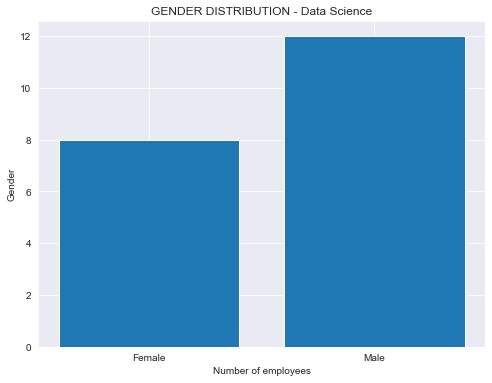

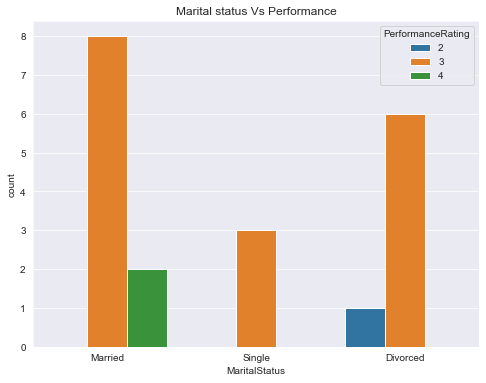

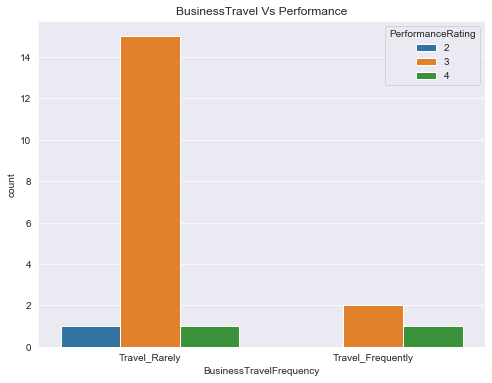

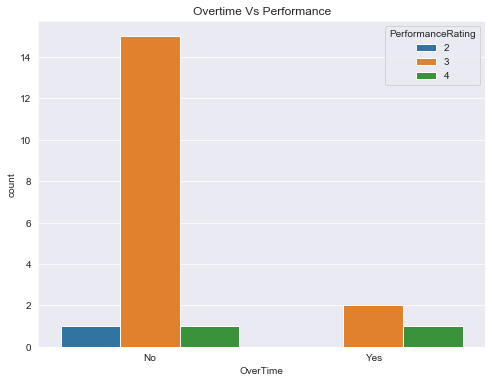

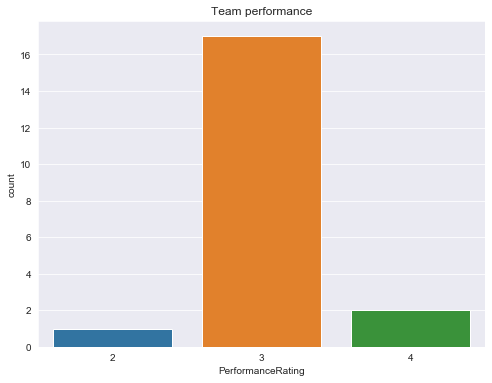

In [354]:
#HORIZONTAL BAR CHART - GENDER DISTRIBUTION:
sb.set_style(style="darkgrid")
plt.subplot(111)
plt.bar(pd.Series(Counter(data_raw_datascience.Gender)).index,pd.Series(Counter(data_raw_datascience.Gender)))
plt.title('GENDER DISTRIBUTION - Data Science')
plt.xlabel('Number of employees')
plt.ylabel('Gender')
plt.title('GENDER DISTRIBUTION - Data Science')
plt.show()

#COUNTPLOT : MARITAL STATUS VS PERFORMANCE RATING:
sb.countplot('MaritalStatus',hue='PerformanceRating',data=data_raw_datascience)
plt.title('Marital status Vs Performance')
plt.show()

#COUNTPLOT : BUSINESS TRAVEL FREQUENCY VS PERFORMANCE RATING:
plt.subplot(111)
sb.countplot('BusinessTravelFrequency',hue='PerformanceRating',data=data_raw_datascience)
plt.title('BusinessTravel Vs Performance')
plt.show()

#COUNTPLOT : OVERTIME VS PERFORMANCE RATING:
plt.subplot(1,1,1)
sb.countplot('OverTime',hue='PerformanceRating',data=data_raw_datascience)
plt.title('Overtime Vs Performance')
plt.show()
sb.countplot('PerformanceRating',data=data_raw_datascience)
plt.title('Team performance')
plt.show()




# DEVELOPMENT DEPARTMENT ANALYSIS:

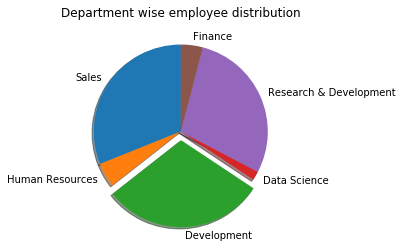

In [136]:
plt.title('Department wise employee distribution')   #TITLE OF THE PIE CHART.....
plt.pie(Department,labels=Department.index,startangle=90,shadow=True,explode=[0,0,0.1,0,0,0]) #EXPLODING THE DATA PERTAINING TO DEVELOPMENT IN THE PIE CHART
plt.show()

In [138]:
#Selecting the 'Development' department data from the dataset:

data_raw_development=data_raw.loc[data_raw['EmpDepartment']=='Development'] #USING LOC TO FILTER DATA RELATING TO 'DEVELOPMENT' DEPARTMENT
data_raw_development

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3
10,E1001022,44,Male,Medical,Single,Development,Developer,Non-Travel,24,3,...,3,9,5,3,5,2,1,4,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,E100980,33,Male,Life Sciences,Single,Development,Senior Developer,Travel_Frequently,3,3,...,1,10,3,3,10,8,9,7,Yes,3
1190,E100983,23,Male,Medical,Married,Development,Developer,Travel_Rarely,4,3,...,1,5,3,4,3,2,0,2,No,4
1193,E100988,29,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,1,4,...,4,10,5,3,10,7,2,8,No,3
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3


In [140]:
# Statistical measure for development department:

data_raw_development.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,36.653740,8.789474,2.853186,2.709141,65.828255,2.789474,1.939058,2.747922,2.817175,15.204986,2.833795,11.008310,2.756233,2.686981,6.725762,4.036011,2.041551,3.958449,3.085873
std,8.832345,8.076716,1.029049,1.090947,19.835949,0.703167,1.145837,1.128003,2.574411,3.660157,1.054129,7.663582,1.220824,0.702434,6.401356,3.670654,3.127999,3.602614,0.388508
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,3.000000
50%,35.000000,6.000000,3.000000,3.000000,65.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,9.000000,3.000000,3.000000,5.000000,2.000000,1.000000,3.000000,3.000000
75%,42.000000,12.000000,4.000000,4.000000,82.000000,3.000000,2.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,3.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


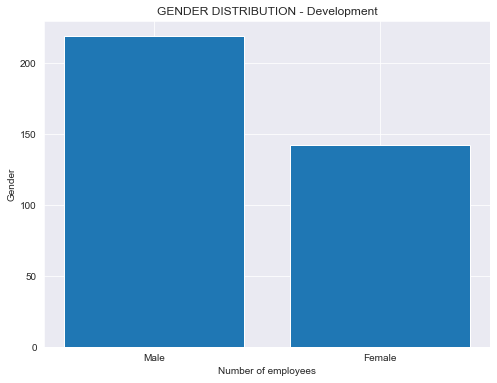

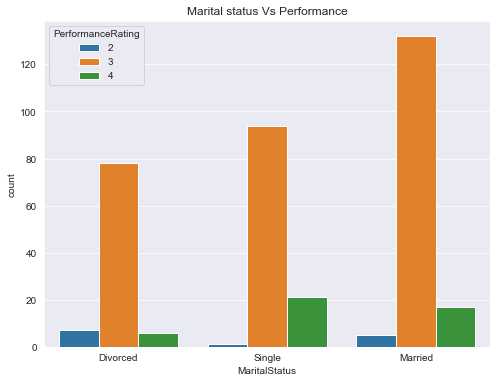

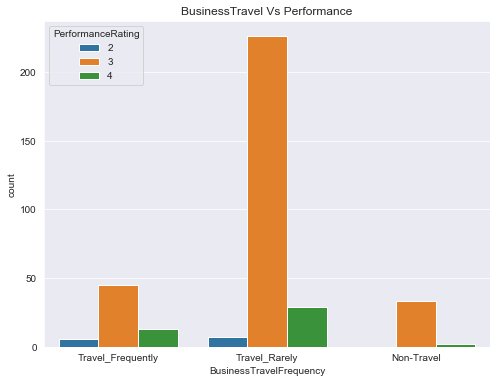

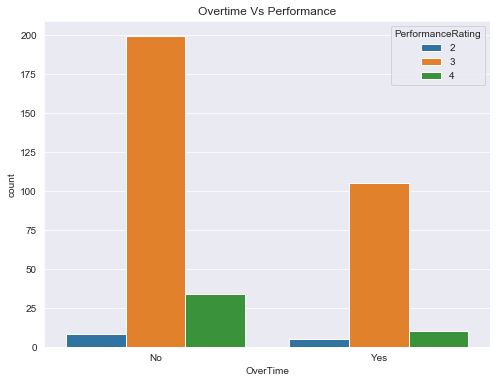

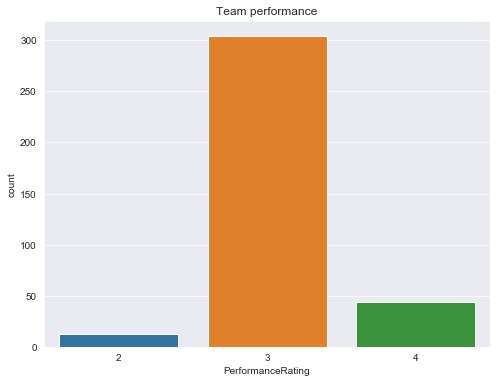

In [355]:
# HORIZONTAL BAR CHART FOR GENDER VDISTRIBUTION IN DEVELOPMENT:
plt.subplot(111)
plt.bar(pd.Series(Counter(data_raw_development.Gender)).index,pd.Series(Counter(data_raw_development.Gender)))
plt.title('GENDER DISTRIBUTION - Development')
plt.xlabel('Number of employees')
plt.ylabel('Gender')
plt.title('GENDER DISTRIBUTION - Development')
plt.show()

#COUNTPLOT : MARITAL STATUS VS PERFORMANCE RATING
sb.countplot('MaritalStatus',hue='PerformanceRating',data=data_raw_development)
plt.title('Marital status Vs Performance')
plt.show()
plt.subplot(111)
sb.countplot('BusinessTravelFrequency',hue='PerformanceRating',data=data_raw_development)
plt.title('BusinessTravel Vs Performance')
plt.show()
plt.subplot(1,1,1)
sb.countplot('OverTime',hue='PerformanceRating',data=data_raw_development)
plt.title('Overtime Vs Performance')
plt.show()
sb.countplot('PerformanceRating',data=data_raw_development)
plt.title('Team performance')
plt.show()

# RESEARCH AND DEVELOPMENT TEAM ANALYSIS:


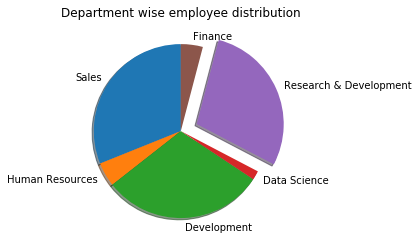

In [149]:
plt.title('Department wise employee distribution')
plt.pie(Department,labels=Department.index,startangle=90,shadow=True,explode=[0,0,0,0,0.2,0])
plt.show()

In [150]:
data_raw_rd=data_raw.loc[data_raw['EmpDepartment']=='Research & Development']
data_raw_rd

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3
158,E1001289,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,...,3,4,1,3,4,3,0,3,No,3
159,E1001290,18,Male,Life Sciences,Single,Research & Development,Research Scientist,Non-Travel,5,2,...,4,0,2,3,0,0,0,0,No,3
160,E1001291,54,Female,Technical Degree,Married,Research & Development,Senior Manager R&D,Travel_Rarely,17,3,...,3,22,2,3,10,7,0,8,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,E1002332,29,Female,Medical,Single,Research & Development,Research Scientist,Travel_Rarely,28,4,...,2,5,3,1,5,4,0,4,No,2
759,E1002335,31,Male,Medical,Single,Research & Development,Manufacturing Director,Non-Travel,5,3,...,2,10,2,3,9,4,1,7,No,2
761,E1002340,39,Male,Medical,Married,Research & Development,Healthcare Representative,Travel_Rarely,6,1,...,1,9,5,3,7,7,1,7,No,3
762,E1002342,27,Male,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Rarely,4,3,...,2,6,0,3,6,2,0,3,No,3


In [151]:
#Statistical measures of 'R&D' department

data_raw_rd.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,37.475219,9.230321,2.874636,2.775510,67.023324,2.685131,1.997085,2.720117,2.693878,15.300292,2.615160,11.746356,2.784257,2.743440,6.988338,4.306122,2.244898,4.029155,2.921283
std,9.499698,8.270077,1.050772,1.113073,20.088096,0.717358,1.158489,1.088391,2.459530,3.701616,1.050203,8.022070,1.328979,0.732341,5.897753,3.601030,3.310195,3.452988,0.559016
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,68.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,44.000000,14.000000,4.000000,4.000000,85.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,36.000000,6.000000,4.000000,33.000000,17.000000,15.000000,17.000000,4.000000


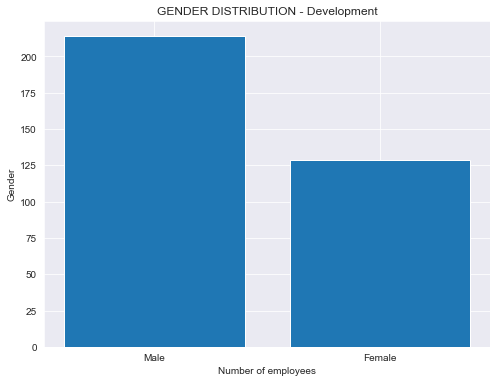

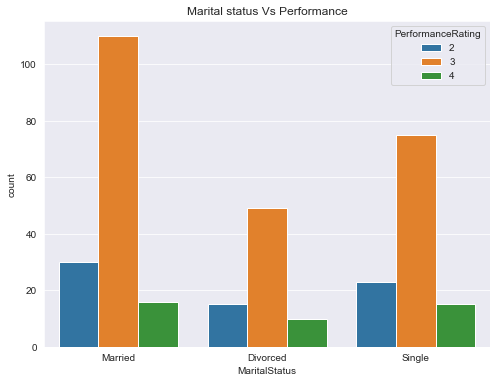

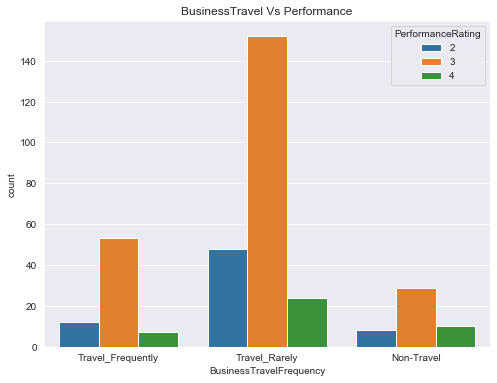

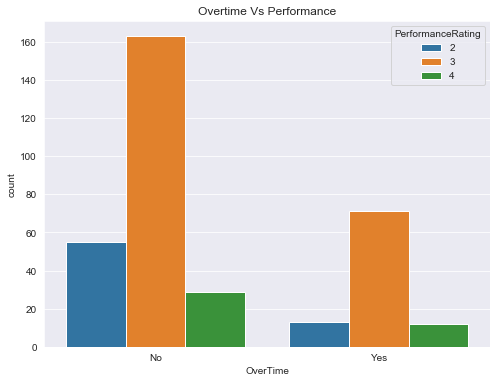

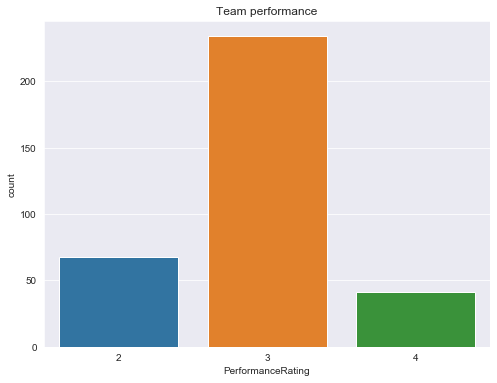

In [356]:
plt.subplot(111)
plt.bar(pd.Series(Counter(data_raw_rd.Gender)).index,pd.Series(Counter(data_raw_rd.Gender)))
plt.title('GENDER DISTRIBUTION - Development')
plt.xlabel('Number of employees')
plt.ylabel('Gender')
plt.title('GENDER DISTRIBUTION - Development')
plt.show()

sb.countplot('MaritalStatus',hue='PerformanceRating',data=data_raw_rd)
plt.title('Marital status Vs Performance')
plt.show()
plt.subplot(111)
sb.countplot('BusinessTravelFrequency',hue='PerformanceRating',data=data_raw_rd)
plt.title('BusinessTravel Vs Performance')
plt.show()
plt.subplot(1,1,1)
sb.countplot('OverTime',hue='PerformanceRating',data=data_raw_rd)
plt.title('Overtime Vs Performance')
plt.show()
sb.countplot('PerformanceRating',data=data_raw_rd)
plt.title('Team performance')
plt.show()

# FINANCE DEPARTMENT ANALYSIS:

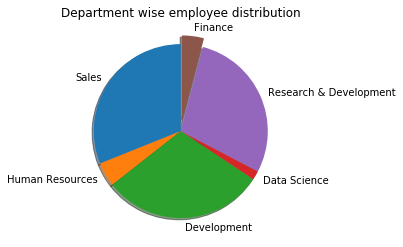

In [154]:
plt.title('Department wise employee distribution')
plt.pie(Department,labels=Department.index,startangle=90,shadow=True,explode=[0,0,0,0,0,0.1])
plt.show()

In [155]:
data_raw_finance=data_raw.loc[data_raw['EmpDepartment']=='Finance']
data_raw_finance

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3
485,E1001874,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,...,4,10,3,2,10,9,6,8,No,2
486,E1001875,34,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Frequently,10,4,...,2,8,3,2,8,2,7,7,No,3
487,E1001877,43,Male,Technical Degree,Divorced,Finance,Finance Manager,Travel_Rarely,27,3,...,3,8,0,3,6,4,0,2,No,3
488,E1001882,28,Male,Medical,Married,Finance,Finance Manager,Travel_Rarely,24,3,...,3,1,3,3,1,1,0,0,Yes,3
489,E1001883,22,Female,Other,Married,Finance,Finance Manager,Non-Travel,26,2,...,2,4,2,2,4,2,1,3,No,2
490,E1001884,50,Male,Medical,Married,Finance,Finance Manager,Travel_Frequently,20,5,...,3,32,3,3,30,8,12,13,No,2
491,E1001885,32,Female,Other,Married,Finance,Finance Manager,Travel_Rarely,5,4,...,4,6,3,3,3,2,0,2,No,3
492,E1001886,44,Female,Medical,Divorced,Finance,Finance Manager,Travel_Rarely,7,3,...,4,23,4,2,22,7,1,10,No,2


In [156]:
#STATISTICAL MEASURES FOR FINANCE DEPARTMENT:

data_raw_finance.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,36.387755,11.877551,3.061224,2.836735,66.693878,2.877551,1.938776,2.653061,2.306122,15.367347,2.693878,10.877551,2.836735,2.673469,7.204082,4.693878,1.959184,4.428571,2.775510
std,9.098572,8.728862,1.125614,1.086795,20.259981,0.780829,1.048971,0.990602,2.181399,3.432042,1.103103,7.672007,1.518592,0.625425,5.563945,3.336690,2.589717,3.599769,0.586846
min,21.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,29.000000,4.000000,3.000000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,13.000000,2.000000,6.000000,2.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,10.000000,3.000000,3.000000,72.000000,3.000000,2.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,3.000000,6.000000,4.000000,1.000000,3.000000,3.000000
75%,43.000000,19.000000,4.000000,4.000000,85.000000,3.000000,2.000000,3.000000,3.000000,17.000000,4.000000,13.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,3.000000
max,55.000000,28.000000,5.000000,4.000000,97.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,36.000000,6.000000,4.000000,30.000000,15.000000,12.000000,13.000000,4.000000


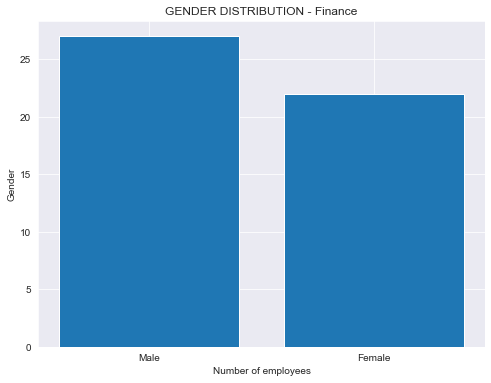

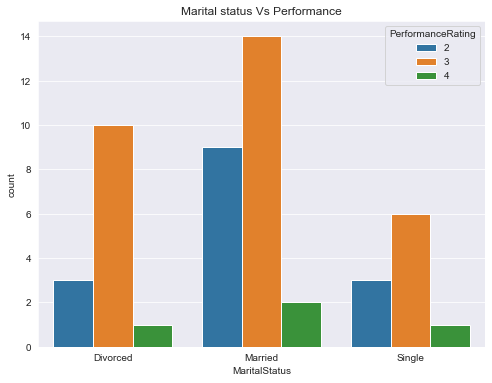

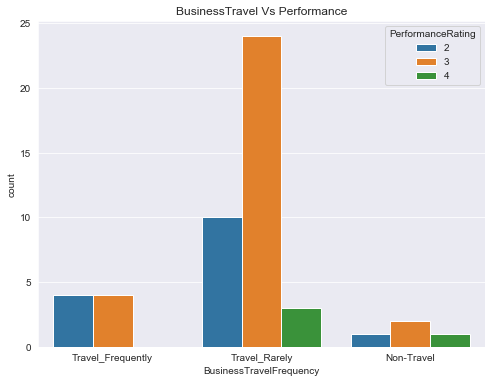

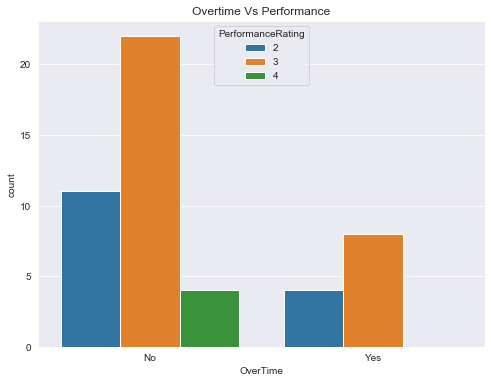

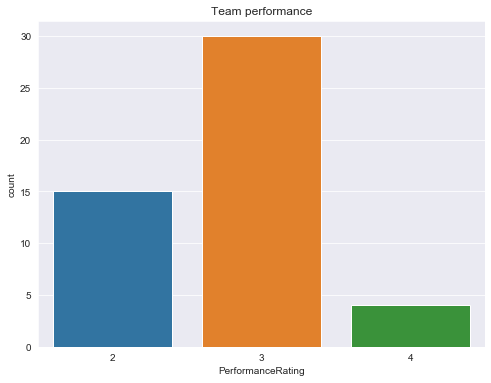

In [357]:
plt.subplot(111)
plt.bar(pd.Series(Counter(data_raw_finance.Gender)).index,pd.Series(Counter(data_raw_finance.Gender)))
plt.title('GENDER DISTRIBUTION - Finance')
plt.xlabel('Number of employees')
plt.ylabel('Gender')
plt.title('GENDER DISTRIBUTION - Finance')
plt.show()

sb.countplot('MaritalStatus',hue='PerformanceRating',data=data_raw_finance)
plt.title('Marital status Vs Performance')
plt.show()
plt.subplot(111)
sb.countplot('BusinessTravelFrequency',hue='PerformanceRating',data=data_raw_finance)
plt.title('BusinessTravel Vs Performance')
plt.show()
plt.subplot(1,1,1)
sb.countplot('OverTime',hue='PerformanceRating',data=data_raw_finance)
plt.title('Overtime Vs Performance')
plt.show()
sb.countplot('PerformanceRating',data=data_raw_finance)
plt.title('Team performance')
plt.show()

# HUMAN RESOURCES DEPARTMENT ANALYSIS:

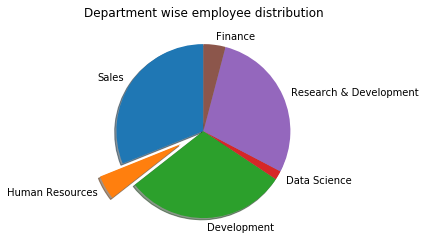

In [160]:
plt.title('Department wise employee distribution')
plt.pie(Department,labels=Department.index,startangle=90,shadow=True,explode=[0,0.3,0,0,0,0])
plt.show()

In [162]:
data_raw_HR=data_raw.loc[data_raw['EmpDepartment']=='Human Resources']
data_raw_HR

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3
81,E1001147,28,Male,Medical,Divorced,Human Resources,Human Resources,Travel_Rarely,8,2,...,4,6,6,3,5,1,0,4,No,3
85,E1001156,36,Male,Life Sciences,Married,Human Resources,Human Resources,Travel_Rarely,8,3,...,3,6,3,3,5,4,0,3,No,3
101,E1001187,39,Female,Life Sciences,Married,Human Resources,Human Resources,Travel_Rarely,2,3,...,3,13,2,3,5,4,0,4,No,3
102,E1001188,33,Male,Human Resources,Divorced,Human Resources,Human Resources,Travel_Rarely,3,2,...,3,7,4,4,4,3,0,3,No,3
187,E1001327,45,Male,Medical,Single,Human Resources,Human Resources,Travel_Rarely,24,4,...,1,6,3,3,6,3,0,4,No,3
211,E1001376,44,Male,Medical,Married,Human Resources,Human Resources,Travel_Rarely,1,2,...,4,24,1,3,20,6,3,6,Yes,2
249,E1001442,35,Male,Technical Degree,Single,Human Resources,Human Resources,Travel_Rarely,8,4,...,2,6,2,1,5,4,1,4,No,2


In [163]:
# Statistical measures of HR department:

data_raw_HR.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,38.425926,8.666667,3.000000,2.629630,65.703704,2.777778,2.055556,2.555556,3.129630,14.740741,2.888889,11.851852,2.574074,2.925926,7.425926,3.574074,1.814815,3.888889,2.925926
std,8.875665,8.051720,0.990521,1.014913,22.078445,0.691366,1.323470,1.093146,2.822058,3.535188,1.003140,8.781214,1.267918,0.696402,7.019116,2.878691,2.649842,2.839523,0.544331
min,19.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,31.500000,2.000000,2.000000,2.000000,48.500000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,38.000000,6.000000,3.000000,3.000000,61.500000,3.000000,2.000000,2.000000,2.500000,14.000000,3.000000,10.000000,2.000000,3.000000,5.000000,2.500000,1.000000,3.000000,3.000000
75%,44.000000,10.000000,4.000000,3.000000,87.750000,3.000000,3.000000,4.000000,4.000000,17.000000,4.000000,14.000000,3.000000,3.000000,9.750000,6.000000,2.000000,7.000000,3.000000
max,59.000000,26.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,23.000000,4.000000,36.000000,6.000000,4.000000,33.000000,10.000000,12.000000,10.000000,4.000000


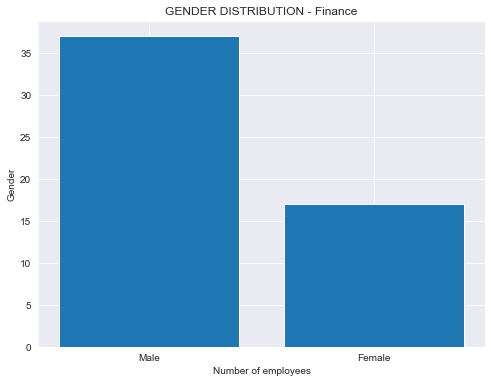

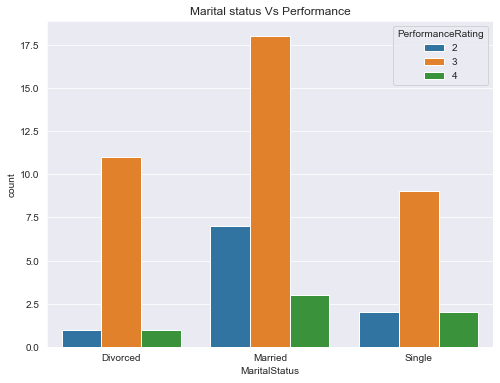

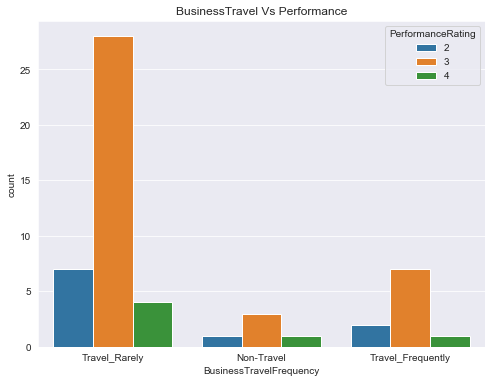

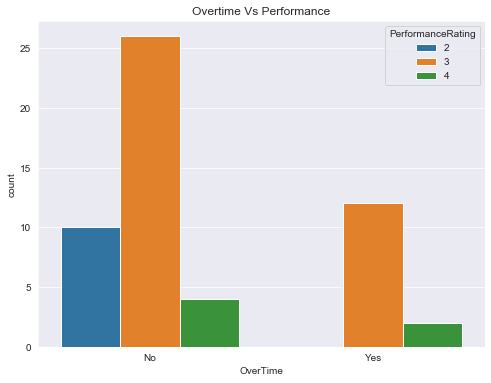

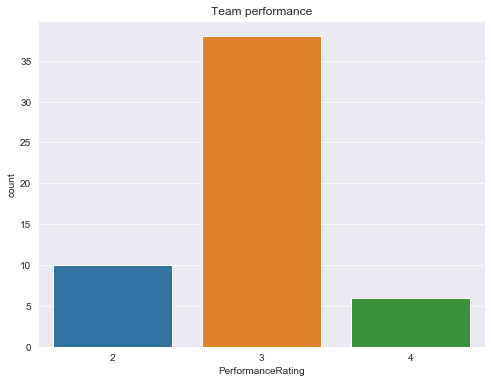

In [358]:
plt.subplot(111)
plt.bar(pd.Series(Counter(data_raw_HR.Gender)).index,pd.Series(Counter(data_raw_HR.Gender)))
plt.title('GENDER DISTRIBUTION - HR')
plt.xlabel('Number of employees')
plt.ylabel('Gender')
plt.title('GENDER DISTRIBUTION - Finance')
plt.show()

sb.countplot('MaritalStatus',hue='PerformanceRating',data=data_raw_HR)
plt.title('Marital status Vs Performance')
plt.show()
plt.subplot(111)
sb.countplot('BusinessTravelFrequency',hue='PerformanceRating',data=data_raw_HR)
plt.title('BusinessTravel Vs Performance')
plt.show()
plt.subplot(1,1,1)
sb.countplot('OverTime',hue='PerformanceRating',data=data_raw_HR)
plt.title('Overtime Vs Performance')
plt.show()
sb.countplot('PerformanceRating',data=data_raw_HR)
plt.title('Team performance')
plt.show()

In [181]:
# Continous variables co relation coefficient:

#GROUPING ALL CONTINOUS VARIABLE TOGETHER.....
data_raw_conti = data_raw.drop(['PerformanceRating','EmpNumber','EmpDepartment','Gender','EducationBackground','MaritalStatus','EmpJobRole','BusinessTravelFrequency','OverTime','Attrition'],axis=1)
data_raw_conti

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,20,2,6,3,3,6,5,0,4
1196,37,10,2,4,80,4,1,4,3,17,1,4,2,3,1,0,0,0
1197,50,28,1,4,74,4,1,3,1,11,3,20,3,3,20,8,3,8
1198,34,9,3,4,46,2,3,2,1,14,2,9,3,4,8,7,7,7


In [182]:
data_raw_conti.corr() #co relation co eff betweeen all the continous variable......

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666


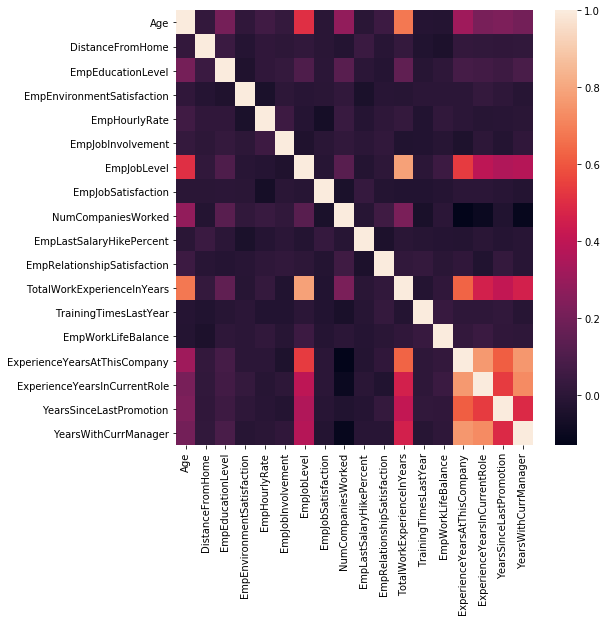

In [195]:
#Visualizing the co relation co eff. using Heatmap:

from matplotlib import rcParams
rcParams["figure.figsize"]=[8,8]
sb.heatmap(data_raw_conti.corr())

# It is observed that, employement level and number

# DATA_PROCESSING :

In [218]:
#ENCODING CATEGORICAL VARIABLE USING LABELENCODER()

enc = LabelEncoder()
data_raw.EmpDepartment = enc.fit_transform(data_raw.EmpDepartment)
data_raw.Gender        = enc.fit_transform(data_raw.Gender)
data_raw.EducationBackground = enc.fit_transform(data_raw.EducationBackground)
data_raw.MaritalStatus       = enc.fit_transform(data_raw.MaritalStatus)
data_raw.EmpJobRole          = enc.fit_transform(data_raw.EmpJobRole)
data_raw.BusinessTravelFrequency = enc.fit_transform(data_raw.BusinessTravelFrequency)
data_raw.OverTime                = enc.fit_transform(data_raw.OverTime)
data_raw.Attrition               = enc.fit_transform(data_raw.Attrition)



In [216]:
#GROUPING ALL CATEGORICAL VARIABLES TOGETHER.....

data_raw_cat = data_raw.loc[:,['EmpDepartment','Gender','EducationBackground','MaritalStatus','EmpJobRole','BusinessTravelFrequency','OverTime','Attrition']]
data_raw_cat

,EmpDepartment,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,5,1,2,2,13,2,0,0
1,5,1,2,2,13,2,0,0
2,5,1,1,1,13,1,1,0
3,3,1,0,0,8,2,0,0
4,5,1,2,2,13,2,0,0
...,...,...,...,...,...,...,...,...
1195,5,0,3,0,13,1,1,0
1196,1,1,1,2,15,2,0,0
1197,1,1,3,1,15,2,1,0
1198,0,0,3,2,1,2,0,0


In [207]:
data_raw_cat.corr()  #CO RELATION CO.EFF FOR CATEGORICAL VARIABLE....

,EmpDepartment,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
EmpDepartment,1.000000,-0.010925,-0.026874,0.067272,0.568973,-0.045233,-0.026841,0.048006
Gender,-0.010925,1.000000,0.009922,-0.042169,0.011332,-0.043608,-0.038410,0.035758
EducationBackground,-0.026874,0.009922,1.000000,-0.001097,-0.012325,0.012382,0.007046,0.027161
MaritalStatus,0.067272,-0.042169,-0.001097,1.000000,0.038023,0.028520,-0.022833,0.162969
EmpJobRole,0.568973,0.011332,-0.012325,0.038023,1.000000,-0.086251,0.015075,0.037508
BusinessTravelFrequency,-0.045233,-0.043608,0.012382,0.028520,-0.086251,1.000000,0.032229,0.007217
OverTime,-0.026841,-0.038410,0.007046,-0.022833,0.015075,0.032229,1.000000,0.224535
Attrition,0.048006,0.035758,0.027161,0.162969,0.037508,0.007217,0.224535,1.000000


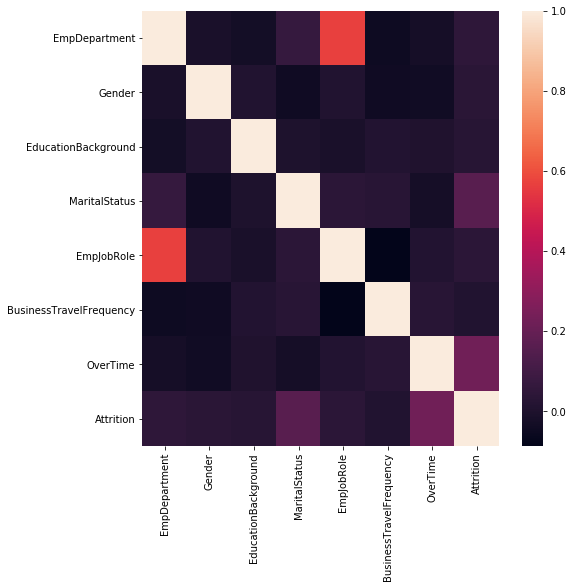

In [211]:
#Co relation heatmap of categorical variable:

rcParams["figure.figsize"] = [8,8]
sb.heatmap(data_raw_cat.corr())
plt.show()

# MODEL
- Model selection and Model building:

In [217]:
data_raw.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,1
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,1
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,2
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,1
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,1


In [233]:
# Preprocessing the data : Removing emp number column:

data = data_raw.drop(['EmpNumber'],axis=1)
data.head(3)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4


In [235]:
#LABELENCODING CATEGORICAL DATA:

data.EmpDepartment = enc.fit_transform(data.EmpDepartment)
data.Gender        = enc.fit_transform(data.Gender)
data.EducationBackground = enc.fit_transform(data.EducationBackground)
data.MaritalStatus       = enc.fit_transform(data.MaritalStatus)
data.EmpJobRole          = enc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency = enc.fit_transform(data.BusinessTravelFrequency)
data.OverTime                = enc.fit_transform(data.OverTime)
data.Attrition               = enc.fit_transform(data.Attrition)



In [236]:
data.head(3)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4


In [237]:
Counter(data.PerformanceRating)  #Count of target variable......

Counter({3: 874, 4: 132, 2: 194})

In [246]:
#DEFINING X AND Y FOR THE MODEL:

X = data.iloc[:,0:26]
y  = data.PerformanceRating

- FEATURE IMPORTANCE USING EXTERNAL TREES CLASSIFIER:

[0.02931749 0.01931384 0.02438232 0.02251884 0.04843622 0.03425136
 0.02175561 0.0286003  0.02717684 0.1511642  0.02997995 0.02381323
 0.0234566  0.02639342 0.02695127 0.0143237  0.15265693 0.02588141
 0.02562213 0.02610768 0.03445342 0.03300807 0.03662147 0.07066648
 0.03142108 0.01172612]


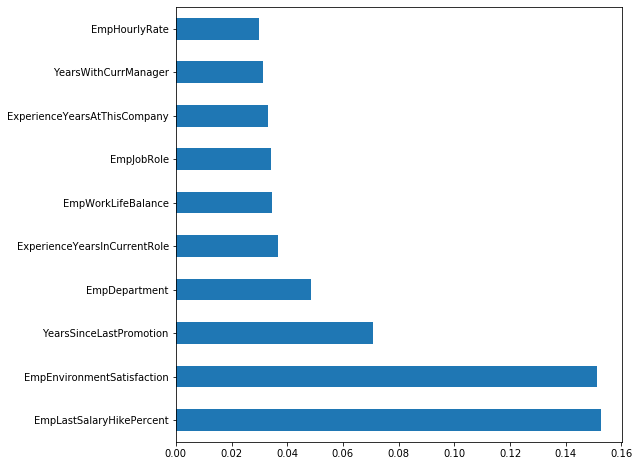

In [247]:
#FEATURE SELECTION USING EXTERNAL TREES CLASSIFIER:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#IT IS OBSERVED 'EMPLOYEE LAST HIKE PERCENTAGE' AND 'EMPLOYEE ENVIRONMENT SATISFACTION' PLAY A MAJOR ROLE IN PERFORMANCE RATING

In [248]:
#IMPORTING THE MODEL : XGBOOST

!pip install xgboost

# TRAIN_MODEL & PREDICT_MODEL:

In [250]:
#SPLITTING THE X AND Y TO TRAIN AND TEST WITH TESTSIZE = 30%

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [327]:
#PARAMETERS TAKEN FOR THE MODEL : 'LEARNING RATE','N_ESTIMATORS',MAX_DEPTH AND RANDOM_STATE

from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.3,n_estimators=100,max_depth=4,random_state=5)
xgb.fit(X_train,y_train)
y_predict = xgb.predict(X_test)

In [360]:
y_predict

array([3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 2, 3, 3, 3, 4, 3, 2, 3, 3, 3,
       3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 2, 4, 3, 3, 3, 4, 2,
       2, 3, 3, 3, 3, 2, 4, 4, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3,
       3, 4, 3, 3, 2, 4, 4, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 4, 4, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 4, 3, 3,
       2, 2, 3, 4, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 4, 3, 2, 3,
       3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3,

In [328]:
#CROSSTAB FOR EVALUATING THE MODEL:

pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,55,7,1
3,7,250,7
4,1,5,27


In [326]:
accuracy_score(y_test,y_predict)  #ACCURACY SCORE

0.9222222222222223

In [284]:
precision_score(y_test,y_predict,average='weighted') #PRECIION SCORE 

0.9280360531309297

In [267]:
recall_score(y_test,y_predict,average='weighted')  #RECALL SCORE

0.9222222222222223

- USING GRIDSEARCH CV FOR HYPER PARAMTER TUNING:

In [341]:
parameters = {'min_samples_leaf':[50,100,150],
             'max_depth':[2,4,6],
             'n_estimators':[50,100,200]}
             
grid_model = GridSearchCV(XGBClassifier(),parameters,verbose=2)
grid_model.fit(X_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=2, min_samples_leaf=50, n_estimators=50 ...............
[23:52:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=2, min_samples_leaf=50, n_estimators=50, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] max_depth=2, min_samples_leaf=50, n_estimators=50 ...............
[23:52:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=2, min_samples_leaf=50, n_estimators=50, total=   0.2s
[CV] max_depth=2, min_samples_leaf=50, n_estimators=50 ...............
[23:52:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



[CV]  max_depth=2, min_samples_leaf=100, n_estimators=50, total=   0.2s
[CV] max_depth=2, min_samples_leaf=100, n_estimators=50 ..............
[23:52:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=2, min_samples_leaf=100, n_estimators=50, total=   0.1s
[CV] max_depth=2, min_samples_leaf=100, n_estimators=50 ..............
[23:52:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip thr

[CV]  max_depth=2, min_samples_leaf=150, n_estimators=50, total=   0.2s
[CV] max_depth=2, min_samples_leaf=150, n_estimators=50 ..............
[23:53:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=2, min_samples_leaf=150, n_estimators=50, total=   0.1s
[CV] max_depth=2, min_samples_leaf=150, n_estimators=100 .............
[23:53:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip thr

[CV]  max_depth=4, min_samples_leaf=50, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=50, n_estimators=100 ..............
[23:53:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=4, min_samples_leaf=50, n_estimators=100, total=   0.3s
[CV] max_depth=4, min_samples_leaf=50, n_estimators=100 ..............
[23:53:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip thro

[CV]  max_depth=4, min_samples_leaf=100, n_estimators=100, total=   0.4s
[CV] max_depth=4, min_samples_leaf=100, n_estimators=100 .............
[23:53:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=4, min_samples_leaf=100, n_estimators=100, total=   0.4s
[CV] max_depth=4, min_samples_leaf=100, n_estimators=100 .............
[23:53:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip t

[CV]  max_depth=4, min_samples_leaf=150, n_estimators=100, total=   0.4s
[CV] max_depth=4, min_samples_leaf=150, n_estimators=100 .............
[23:53:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=4, min_samples_leaf=150, n_estimators=100, total=   0.3s
[CV] max_depth=4, min_samples_leaf=150, n_estimators=100 .............
[23:53:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip t

[CV]  max_depth=6, min_samples_leaf=50, n_estimators=100, total=   0.4s
[CV] max_depth=6, min_samples_leaf=50, n_estimators=100 ..............
[23:53:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=6, min_samples_leaf=50, n_estimators=100, total=   0.5s
[CV] max_depth=6, min_samples_leaf=50, n_estimators=100 ..............
[23:53:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip thr

[CV]  max_depth=6, min_samples_leaf=100, n_estimators=100, total=   0.5s
[CV] max_depth=6, min_samples_leaf=100, n_estimators=100 .............
[23:53:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=6, min_samples_leaf=100, n_estimators=100, total=   0.4s
[CV] max_depth=6, min_samples_leaf=100, n_estimators=200 .............
[23:53:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip t

[CV]  max_depth=6, min_samples_leaf=150, n_estimators=100, total=   0.4s
[CV] max_depth=6, min_samples_leaf=150, n_estimators=200 .............
[23:53:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  max_depth=6, min_samples_leaf=150, n_estimators=200, total=   0.7s
[CV] max_depth=6, min_samples_leaf=150, n_estimators=200 .............
[23:53:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip t

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   55.8s finished


{'max_depth': 4, 'min_samples_leaf': 50, 'n_estimators': 50}
0.9333333333333333
